# Table of contents

0.1 Importing Libraries

0.2 Importing Data

0.3 Exploring Original Df

0.4 Renaming Columns

0.5 Adjusting Datatypes

0.6 Cleaning / Wrangling / Checking Data

    0.6.1  Overall df checks
    
    0.6.2  user_id
        
    0.6.3  gender
    
    0.6.4  state
   
    0.6.5  age
    
    0.6.6  date_joined
    
    0.6.7  n_dependants 
    
    0.6.8 fam_status
    
    0.6.9 income

0.7 Exporting the Clean Df


### 0.1 Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 0.2 Importing Data

In [2]:
# Identify the file pathway to data files
path = r'C:\Users\CJ\Documents\_CJ-Stuff\Career Foundry\Data Immersion\Ach 4 - Python\2023-03 Instacart Basket Analysis'

In [3]:
# Create 'vars_list' so we only import the variables we need from customer.csv
# so we do NOT accidentally import any PPI (Personal Identifiable Information)
vars_list = ['user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants', 'fam_status', 'income']

In [4]:
# Import data from 'orders_products_merged2.pkl'
cust_original = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'), usecols = vars_list)

### 0.3 Exploring original df

In [5]:
cust_original.shape

(206209, 8)

In [6]:
cust_original.head()

,user_id,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Female,Maryland,26,1/1/2017,1,married,40374


In [7]:
cust_original.tail()

,user_id,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
206204,168073,Female,North Carolina,44,4/1/2020,1,married,148828
206205,49635,Male,Hawaii,62,4/1/2020,3,married,168639
206206,135902,Female,Missouri,66,4/1/2020,2,married,53374
206207,81095,Female,California,27,4/1/2020,1,married,99799
206208,80148,Female,New York,55,4/1/2020,1,married,57095


In [8]:
cust_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  int64 
 1   Gender        206209 non-null  object
 2   STATE         206209 non-null  object
 3   Age           206209 non-null  int64 
 4   date_joined   206209 non-null  object
 5   n_dependants  206209 non-null  int64 
 6   fam_status    206209 non-null  object
 7   income        206209 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 12.6+ MB


All of the columns seem potentially relevant to future analysis, but their names do not follow naming conventions and a few are poorly typed.

In [9]:
cust_original.describe()

,user_id,Age,n_dependants,income
count,206209.000000,206209.000000,206209.000000,206209.000000
mean,103105.000000,49.501646,1.499823,94632.852548
std,59527.555167,18.480962,1.118433,42473.786988
min,1.000000,18.000000,0.000000,25903.000000
25%,51553.000000,33.000000,0.000000,59874.000000
50%,103105.000000,49.000000,1.000000,93547.000000
75%,154657.000000,66.000000,3.000000,124244.000000
max,206209.000000,81.000000,3.000000,593901.000000


All the counts match the shape of the df.
Max user_id = count (indicating user_ids are likely unique)
For the columns that are quantitative (age, n_dependants, income), the basic statistics all seem plausible, although the shape of the income distribution should be investigated to see if the max is an outlier or not.

### 0.4 Renaming columns to follow naming conventions

In [10]:
cust_original.rename(columns = {'Gender' : 'gender', 
                                'STATE' : 'state', 
                                'Age' : 'age'
                               }, inplace = True)

In [11]:
cust_original.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income
0,26711,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Female,Maryland,26,1/1/2017,1,married,40374


### 0.5 Adjusting datatypes to be more appropriate for variables

In [12]:
# The number of dependants currently ranges between 0 and 3,
# and int8 will allow it to grow up to 127
cust_original['n_dependants'] = cust_original['n_dependants'].astype('int8')

In [13]:
# The current range of ages is 18 to 81, but int16 allows for dramatic
# improvements in human logevity. 
cust_original['age'] = cust_original['age'].astype('int16')

In [14]:
# date_joined should be a datetime object
cust_original['date_joined'] = pd.to_datetime(cust_original['date_joined'],errors='raise')

In [15]:
# Gender, state, and fam_status involve a finite number of descriptive flags
# and would be be represented by a categorical datatype
cust_original['gender'] = cust_original['gender'].astype('category')
cust_original['state'] = cust_original['state'].astype('category')
cust_original['fam_status'] = cust_original['fam_status'].astype('category')

In [16]:
# Confirming the changes took.
cust_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       206209 non-null  int64         
 1   gender        206209 non-null  category      
 2   state         206209 non-null  category      
 3   age           206209 non-null  int16         
 4   date_joined   206209 non-null  datetime64[ns]
 5   n_dependants  206209 non-null  int8          
 6   fam_status    206209 non-null  category      
 7   income        206209 non-null  int64         
dtypes: category(3), datetime64[ns](1), int16(1), int64(2), int8(1)
memory usage: 5.9 MB


### 0.6 Cleaning data

#### 0.6.1 Overall df checks

In [17]:
# Checking for nulls across df
cust_original.isnull().sum()

user_id         0
gender          0
state           0
age             0
date_joined     0
n_dependants    0
fam_status      0
income          0
dtype: int64

In [18]:
# Check for mixed data types
for col in cust_original.columns.tolist():
  weird = (cust_original[[col]].applymap(type) != cust_original[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (cust_original[weird]) > 0:
    print (col)

In [19]:
# Checking for duplicates
dups = cust_original[cust_original.duplicated()]

In [20]:
dups.shape

(0, 8)

In [21]:
# The dataframe of dups has zero rows which means that 
# there were no duplicated rows.

#### 0.6.2 - user_id cleaning/wrangling

In [22]:
# Confirming that each user_id only appears once
cust_original['user_id'].describe()

count    206209.000000
mean     103105.000000
std       59527.555167
min           1.000000
25%       51553.000000
50%      103105.000000
75%      154657.000000
max      206209.000000
Name: user_id, dtype: float64

#### 0.6.3 - gender cleaning/wrangling

In [23]:
#First some exploration of the data
cust_original['gender'].value_counts()

Male      104067
Female    102142
Name: gender, dtype: int64

The split within the data is roughly 50-50 which appropriately mirrors the population.

#### 0.6.4 - state cleaning/wrangling

In [24]:
#First some exploration of the data
cust_original['state'].describe()

count      206209
unique         51
top       Alabama
freq         4044
Name: state, dtype: object

In [25]:
# To explore the data in the state column, we're going to create a subset with the 
# unique values and their counts to explore them.
state_list = cust_original['state'].value_counts()

In [26]:
state_list

Alabama                 4044
District of Columbia    4044
Iowa                    4044
Indiana                 4044
Illinois                4044
Idaho                   4044
Georgia                 4044
Florida                 4044
Hawaii                  4044
Delaware                4044
Connecticut             4044
Colorado                4044
California              4044
Arkansas                4044
Arizona                 4044
Alaska                  4044
South Dakota            4043
Ohio                    4043
Oklahoma                4043
Oregon                  4043
Pennsylvania            4043
Rhode Island            4043
South Carolina          4043
Wisconsin               4043
Tennessee               4043
Texas                   4043
Utah                    4043
Vermont                 4043
Virginia                4043
Washington              4043
West Virginia           4043
North Carolina          4043
North Dakota            4043
Missouri                4043
New York      

All 50 states plus D.C. appear to be listed correctly.

#### 0.6.5- age cleaning/wrangling

In [27]:
#First some exploration of the data's shape and spread
cust_original['age'].describe()

count    206209.000000
mean         49.501646
std          18.480962
min          18.000000
25%          33.000000
50%          49.000000
75%          66.000000
max          81.000000
Name: age, dtype: float64

In [28]:
cust_original['age'].value_counts()

19    3329
55    3317
51    3317
56    3306
32    3305
      ... 
65    3145
25    3127
66    3114
50    3102
36    3101
Name: age, Length: 64, dtype: int64

<AxesSubplot:ylabel='Frequency'>

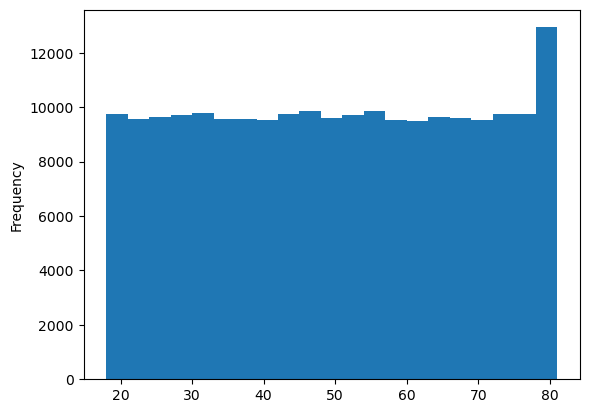

In [29]:
# Making a histogram of ages
cust_original['age'].plot.hist(bins = 21)

There appears to be a spike in users in the 78-81 age range, whereas the rest of the users are almost uniformly distributed across the age ranges.  This is not what I'd expect to see in a real data set, but it is plausible for a fictious dataset (specially if we're going to 'discover' that we have a large customer base among senior citizens) so I'm not going to address it any further.

#### 0.6.6 - date_joined cleaning/wrangling

In [30]:
#First some exploration of the data's shape and spread
cust_original['date_joined'].describe()

C:\Users\CJ\AppData\Local\Temp\ipykernel_3168\2491443623.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  cust_original['date_joined'].describe()


count                  206209
unique                   1187
top       2018-09-17 00:00:00
freq                      213
first     2017-01-01 00:00:00
last      2020-04-01 00:00:00
Name: date_joined, dtype: object

In [31]:
cust_original['date_joined'].min()

Timestamp('2017-01-01 00:00:00')

In [32]:
cust_original['date_joined'].max()

Timestamp('2020-04-01 00:00:00')

There are 1187 unique dates.  Given the data set covers roughly 3.25 years, we would expext to see roughly 1186 dates (365 days/year * 3.25 years) so this data seems reasonable. 

In [33]:
cust_original['date_joined'].value_counts()

2018-09-17    213
2018-02-10    212
2019-04-01    211
2019-09-21    211
2017-12-19    210
             ... 
2018-09-01    141
2018-01-22    140
2017-11-24    139
2019-07-18    138
2018-08-06    128
Name: date_joined, Length: 1187, dtype: int64

The dates appear to have a reasonable distribution (given the fictious nature of the dataset)

#### 0.6.7 - n_dependants cleaning/wrangling

In [34]:
#First some exploration of the data's shape and spread
cust_original['n_dependants'].describe()

count    206209.000000
mean          1.499823
std           1.118433
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max           3.000000
Name: n_dependants, dtype: float64

In [35]:
cust_original['n_dependants'].value_counts()

0    51602
3    51594
1    51531
2    51482
Name: n_dependants, dtype: int64

All of the values for this variable are reasonable and the spead is to be expected of a fictious data set.

#### 0.6.8 - fam_status cleaning/wrangling

In [36]:
#First some exploration of the data's shape and spread
cust_original['fam_status'].describe()

count      206209
unique          4
top       married
freq       144906
Name: fam_status, dtype: object

In [37]:
cust_original['fam_status'].value_counts()

married                             144906
single                               33962
divorced/widowed                     17640
living with parents and siblings      9701
Name: fam_status, dtype: int64

All of the values for this variable are reasonable

#### 0.6.9 - income cleaning/wrangling

In [38]:
#First some exploration of the data's shape and spread
cust_original['income'].describe()

count    206209.000000
mean      94632.852548
std       42473.786988
min       25903.000000
25%       59874.000000
50%       93547.000000
75%      124244.000000
max      593901.000000
Name: income, dtype: float64

<AxesSubplot:ylabel='Frequency'>

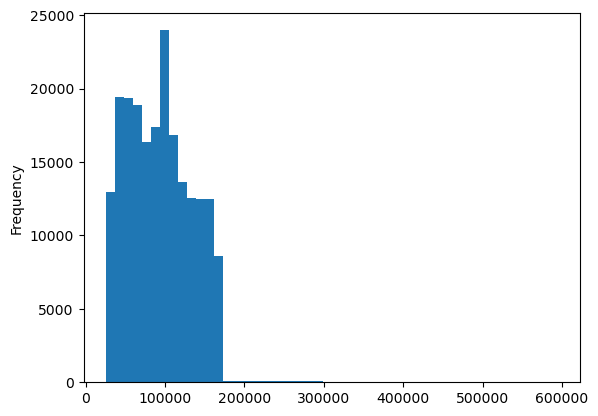

In [39]:
# Making a histogram of income
cust_original['income'].plot.hist(bins = 50)

<AxesSubplot:xlabel='income', ylabel='income'>

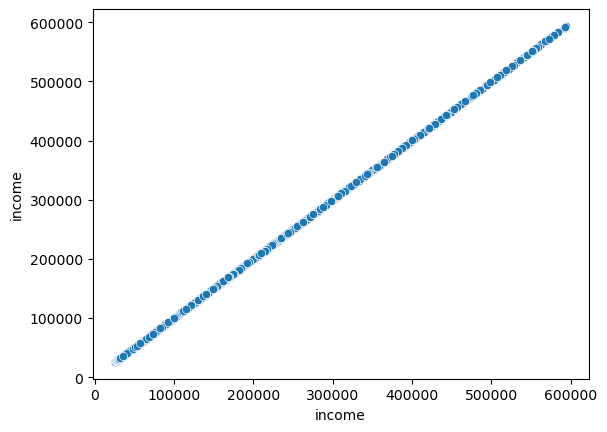

In [40]:
# Making a scatterplot of income
sns.scatterplot(x = 'income', y = 'income', data = cust_original)

While the majority of incomes are less than 125k, there are clearly incomes spread out all the way up through the max (~594k).  Given that these appear to be legitimately upper-income customers, we should leave this data as-is.

### 0.7 Exporting the clean df

In [41]:
#Confirming df changes are in place before exporting
cust_original.dtypes

user_id                  int64
gender                category
state                 category
age                      int16
date_joined     datetime64[ns]
n_dependants              int8
fam_status            category
income                   int64
dtype: object

In [42]:
cust_original.shape

(206209, 8)

In [43]:
cust_original.head()

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income
0,26711,Female,Missouri,48,2017-01-01,3,married,165665
1,33890,Female,New Mexico,36,2017-01-01,0,single,59285
2,65803,Male,Idaho,35,2017-01-01,2,married,99568
3,125935,Female,Iowa,40,2017-01-01,0,single,42049
4,130797,Female,Maryland,26,2017-01-01,1,married,40374


In [44]:
# Export df as customers_clean
cust_original.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'customers_clean.pkl'))